## Alhajuela Lake Bed Sedimentation Prediction

In [93]:
import sys
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
print(np.__version__)
print(pd.__version__)
print(sys.version)
print(sklearn.__version__)
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing
plt.rcParams.update({'font.size': 16})


1.21.2
1.3.2
3.7.10 | packaged by conda-forge | (default, Feb 19 2021, 15:37:01) [MSC v.1916 64 bit (AMD64)]
0.24.2


In [48]:
print(np.__version__)
print(pd.__version__)
print(sys.version)
print(sklearn.__version__)

1.21.2
1.3.2
3.7.10 | packaged by conda-forge | (default, Feb 19 2021, 15:37:01) [MSC v.1916 64 bit (AMD64)]
0.24.2


In [49]:
df = pd.read_csv('data/TrainingDataV1.csv', delim_whitespace=False, header=0)

In [50]:
df.keys()

Index(['x', 'y', 'horigin', 'year', 'height', 'slope', 'aspect', 'dh', 'T',
       'depth', 'dRM1', 'dRM2', 'dRM3', 'dRM4', 'dRM5', 'dRM6', 'dRM7',
       'dRMtot', 'Xfactor'],
      dtype='object')

dh is horigin - height / T


In [51]:
df.head()

,x,y,horigin,year,height,slope,aspect,dh,T,depth,dRM1,dRM2,dRM3,dRM4,dRM5,dRM6,dRM7,dRMtot,Xfactor
0,"655,559.71","1,015,911.65",66.36,2008,67.46,0.35,180.00,0.10,11,35.76,"16,204.93","16,088.46","12,588.49","7,720.53","10,685.86","9,201.77","6,142.22","78,632.26",10
1,"655,584.71","1,015,911.65",66.36,2008,67.46,3.94,278.92,0.10,11,35.76,"16,201.95","16,088.57","12,588.64","7,730.47","10,682.52","9,197.89","6,128.26","78,618.29",10
2,"655,609.71","1,015,911.65",66.70,2008,68.40,7.63,329.48,0.15,11,36.10,"16,199.02","16,088.72","12,588.83","7,740.48","10,679.24","9,194.07","6,114.36","78,604.72",10
3,"655,634.71","1,015,911.65",66.70,2008,68.45,12.34,0.00,0.16,11,36.10,"16,196.12","16,088.91","12,589.07","7,750.56","10,676.01","9,190.33","6,100.53","78,591.53",10
4,"655,659.71","1,015,911.65",66.70,2008,67.60,15.54,48.72,0.08,11,36.10,"16,193.26","16,089.14","12,589.36","7,760.70","10,672.84","9,186.65","6,086.78","78,578.73",10


In [52]:
col_study = ['x', 'y', 'horigin', 'year', 'slope', 'aspect', 'T', 'dRM1',
       'dRM2', 'dRM3', 'dRM4', 'dRM5', 'dRM6', 'dRM7', 'dRMtot', 'depth','Xfactor']
param_study = 'dh'

# Correlation Analysis and Feature Selection

In [54]:
pd.options.display.float_format = '{:,.3f}'.format

In [55]:
df.corr()

,x,y,horigin,year,height,slope,aspect,dh,T,depth,dRM1,dRM2,dRM3,dRM4,dRM5,dRM6,dRM7,dRMtot,Xfactor
x,1.000,0.254,0.394,0.000,0.351,-0.373,0.124,-0.049,-0.000,0.394,-0.294,-0.212,-0.120,0.573,-0.179,-0.150,-0.251,-0.193,0.000
y,0.254,1.000,0.435,0.000,0.365,-0.171,0.014,-0.101,-0.000,0.435,-0.993,-0.986,-0.882,0.405,-0.681,-0.331,0.694,-0.760,-0.000
horigin,0.394,0.435,1.000,0.000,0.938,0.087,-0.028,0.019,-0.000,1.000,-0.445,-0.426,-0.365,0.380,-0.286,-0.122,0.245,-0.304,0.000
year,0.000,0.000,0.000,1.000,0.154,0.058,0.004,0.389,-0.606,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.115
height,0.351,0.365,0.938,0.154,1.000,0.107,-0.004,0.345,-0.100,0.938,-0.371,-0.351,-0.293,0.359,-0.219,-0.072,0.219,-0.232,-0.009
slope,-0.373,-0.171,0.087,0.058,0.107,1.000,-0.084,0.081,-0.058,0.087,0.195,0.172,0.135,-0.205,0.139,0.102,0.066,0.162,0.022
aspect,0.124,0.014,-0.028,0.004,-0.004,-0.084,1.000,0.066,0.001,-0.028,-0.025,-0.010,0.001,0.070,-0.017,-0.023,-0.055,-0.017,-0.005
dh,-0.049,-0.101,0.019,0.389,0.345,0.081,0.066,1.000,-0.392,0.019,0.107,0.112,0.115,0.006,0.119,0.105,-0.018,0.126,0.151
T,-0.000,-0.000,-0.000,-0.606,-0.100,-0.058,0.001,-0.392,1.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,-0.721
depth,0.394,0.435,1.000,0.000,0.938,0.087,-0.028,0.019,0.000,1.000,-0.445,-0.426,-0.365,0.380,-0.286,-0.122,0.245,-0.304,0.000


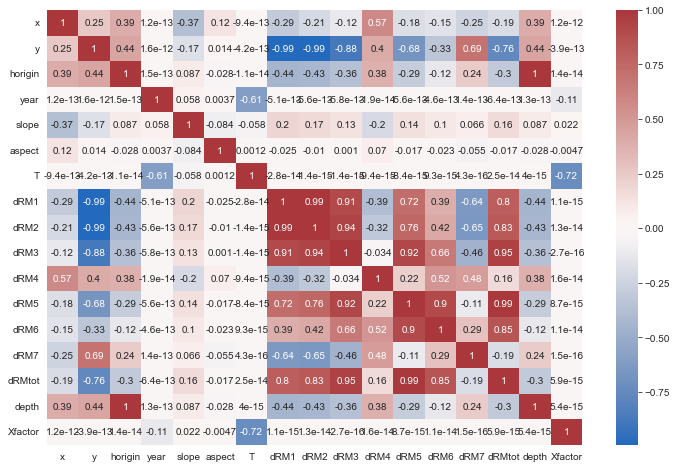

In [56]:
plt.figure(figsize=(12,8))
sns.heatmap(df[col_study].corr(), annot=True, cmap="vlag")
plt.show()

---

# Correlation Matrix

#### Useful daigrnostic tool to identify colinearity between predictors

In [62]:
pd.options.display.float_format = '{:,.2f}'.format
corr_matrix = df.corr()
corr_matrix

,x,y,horigin,year,height,slope,aspect,dh,T,depth,dRM1,dRM2,dRM3,dRM4,dRM5,dRM6,dRM7,dRMtot,Xfactor
x,1.00,0.25,0.39,0.00,0.35,-0.37,0.12,-0.05,-0.00,0.39,-0.29,-0.21,-0.12,0.57,-0.18,-0.15,-0.25,-0.19,0.00
y,0.25,1.00,0.44,0.00,0.36,-0.17,0.01,-0.10,-0.00,0.44,-0.99,-0.99,-0.88,0.40,-0.68,-0.33,0.69,-0.76,-0.00
horigin,0.39,0.44,1.00,0.00,0.94,0.09,-0.03,0.02,-0.00,1.00,-0.44,-0.43,-0.36,0.38,-0.29,-0.12,0.24,-0.30,0.00
year,0.00,0.00,0.00,1.00,0.15,0.06,0.00,0.39,-0.61,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.11
height,0.35,0.36,0.94,0.15,1.00,0.11,-0.00,0.34,-0.10,0.94,-0.37,-0.35,-0.29,0.36,-0.22,-0.07,0.22,-0.23,-0.01
slope,-0.37,-0.17,0.09,0.06,0.11,1.00,-0.08,0.08,-0.06,0.09,0.20,0.17,0.13,-0.20,0.14,0.10,0.07,0.16,0.02
aspect,0.12,0.01,-0.03,0.00,-0.00,-0.08,1.00,0.07,0.00,-0.03,-0.02,-0.01,0.00,0.07,-0.02,-0.02,-0.05,-0.02,-0.00
dh,-0.05,-0.10,0.02,0.39,0.34,0.08,0.07,1.00,-0.39,0.02,0.11,0.11,0.11,0.01,0.12,0.10,-0.02,0.13,0.15
T,-0.00,-0.00,-0.00,-0.61,-0.10,-0.06,0.00,-0.39,1.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.72
depth,0.39,0.44,1.00,0.00,0.94,0.09,-0.03,0.02,0.00,1.00,-0.44,-0.43,-0.36,0.38,-0.29,-0.12,0.24,-0.30,0.00


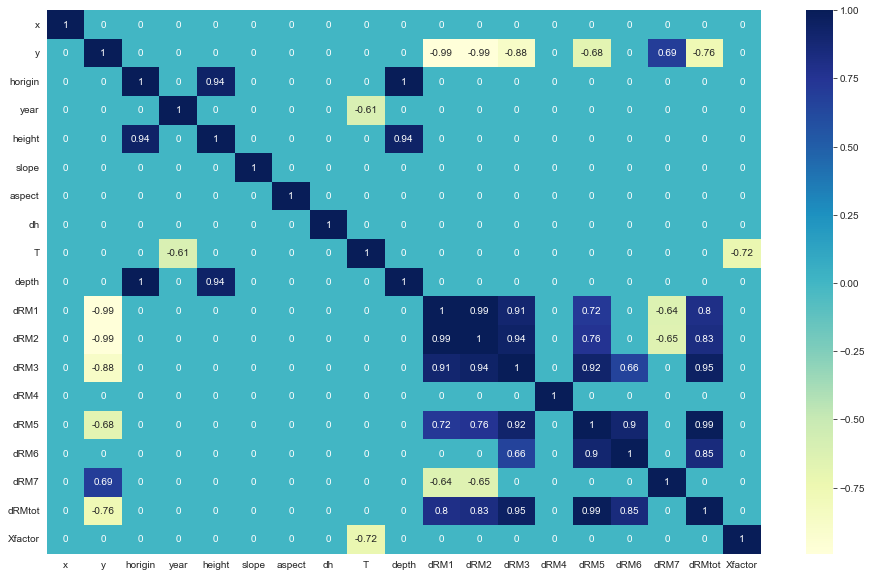

In [64]:
plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.show()

---

# **Random Forest**

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [66]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [67]:
from sklearn.ensemble import RandomForestRegressor

---

## Future prediction

In [279]:
dfTrain = sklearn.utils.resample(df[df.year < 2017], n_samples=50000, random_state=None, stratify=None)
Xo = dfTrain[col_study]
yo = dfTrain[param_study]
dfTest = sklearn.utils.resample(df[df.year > 2017], n_samples=50000, random_state=None, stratify=None)

Xt = dfTest[col_study]
yt = dfTest[param_study]
X_traino, X_testo, y_traino, y_testo = train_test_split(Xo, yo, test_size=0.3, random_state=42)

In [280]:
forest2 = RandomForestRegressor()
forest2.fit(X_traino, y_traino)

y_train_pred = forest2.predict(X_traino)
y_test_pred = forest2.predict(X_testo)
y_pred = forest2.predict(Xt)

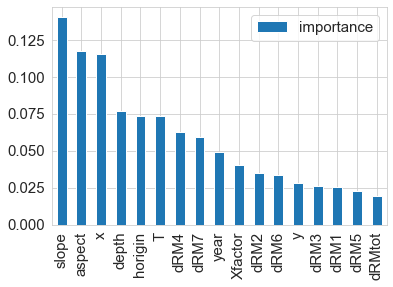

In [225]:
plt.rcParams.update({'font.size': 15})

result = pd.DataFrame(forest2.feature_importances_,  df[col_study].columns)
result.columns = ['importance']
result.sort_values(by='importance', ascending=False).plot(kind='bar');

In [133]:
mean_absolute_error(y_pred, yt)

0.40003201464504107

In [134]:
r2_score(yt, y_pred)

-0.5663410697165767

In [135]:
print(y_train_pred.shape," ",y_traino.shape," ",y_test_pred.shape," ",y_testo.shape)

(35000,)   (35000,)   (15000,)   (15000,)


## Validation curve

In [227]:
dfTrain = sklearn.utils.resample(df[df.year < 2017], n_samples=30000, random_state=None, stratify=None)
Xo = dfTrain[col_study]
yo = dfTrain[param_study]
dfTest = sklearn.utils.resample(df[df.year > 2017], n_samples=30000, random_state=None, stratify=None)

Xt = dfTest[col_study]
yt = dfTest[param_study]
X_traino, X_testo, y_traino, y_testo = train_test_split(Xo, yo, test_size=0.3, random_state=42)
errors_1 = []
range_1 = range(1,100,10)
for i in range_1:
    forest2 = RandomForestRegressor(n_estimators = i)
    forest2.fit(X_traino, y_traino)
    y_train_pred = forest2.predict(X_traino)
    y_test_pred = forest2.predict(X_testo)
    y_pred = forest2.predict(Xt)
    errors_1.append(mean_absolute_error(y_pred, yt))
    
errors_2 = []
range_2 = range(1,100,10)
for i in range_2:
    forest2 = RandomForestRegressor(max_depth = i)
    forest2.fit(X_traino, y_traino)
    y_train_pred = forest2.predict(X_traino)
    y_test_pred = forest2.predict(X_testo)
    y_pred = forest2.predict(Xt)
    errors_2.append(mean_absolute_error(y_pred, yt))


fig, axs = plt.subplots(2, 1)
axs[0].plot(range_1,errors_1)
axs[0].set_xlabel('number of estimators')
axs[0].set_ylabel('MSE')
axs[0].grid(True)

axs[1].plot(range_2,errors_2)
axs[1].set_xlabel('number of cpp_alpha')
axs[1].set_ylabel('MSE')

fig.tight_layout()
plt.show()

KeyboardInterrupt: 

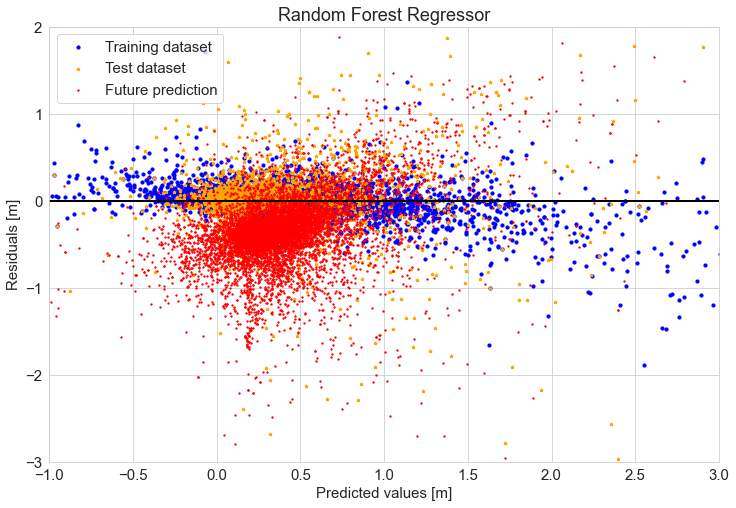

In [247]:
plt.figure(figsize=(12,8))
plt.title('Random Forest Regressor')
plt.scatter(y_train_pred, y_train_pred - y_traino, c='blue', marker='o',s=10, label='Training dataset')
plt.scatter(y_test_pred, y_test_pred - y_testo, c='orange', marker='*',s=10, label='Test dataset')
plt.scatter(y_pred, y_pred - yt, c='red', marker='.',s=7, label='Future prediction')
plt.xlabel('Predicted values [m]')
plt.ylabel('Residuals [m]')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-50, xmax=100, lw=2, color='k')
plt.xlim([-1, 3])
plt.ylim([-3, 2])
plt.show()

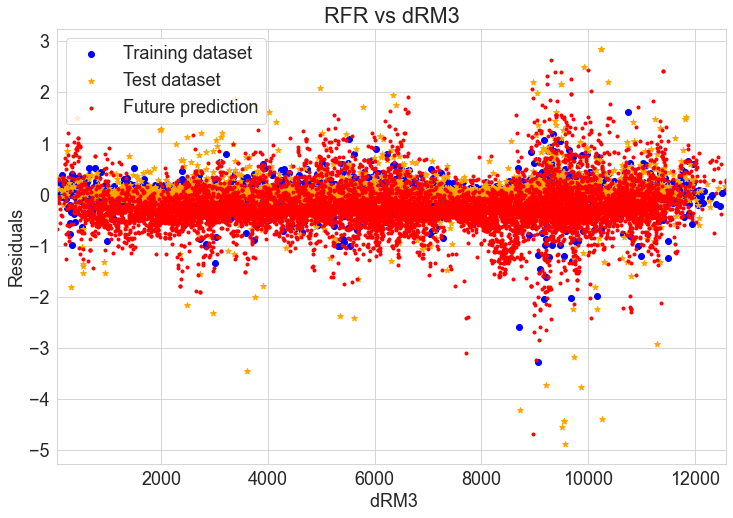

In [214]:
#forest2 = RandomForestRegressor()
#forest2.fit(X_traino, y_traino)

#y_train_pred = forest2.predict(X_traino)
#y_test_pred = forest2.predict(X_testo)
#y_pred = forest2.predict(Xt)

plt.figure(figsize=(12,8))
plt.title('RFR vs dRM3')
plt.scatter(X_traino['dRM3'], y_train_pred - y_traino, c='blue', marker='o', label='Training dataset')
plt.scatter(X_testo['dRM3'], y_test_pred - y_testo, c='orange', marker='*', label='Test dataset')
plt.scatter(Xt['dRM3'], y_pred - yt, c='red', marker='.', label='Future prediction')
plt.xlabel(' dRM3')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-50, xmax=100, lw=2, color='k')
plt.xlim([Xt['dRM3'].values.min(), Xt['dRM3'].values.max()])
plt.show()

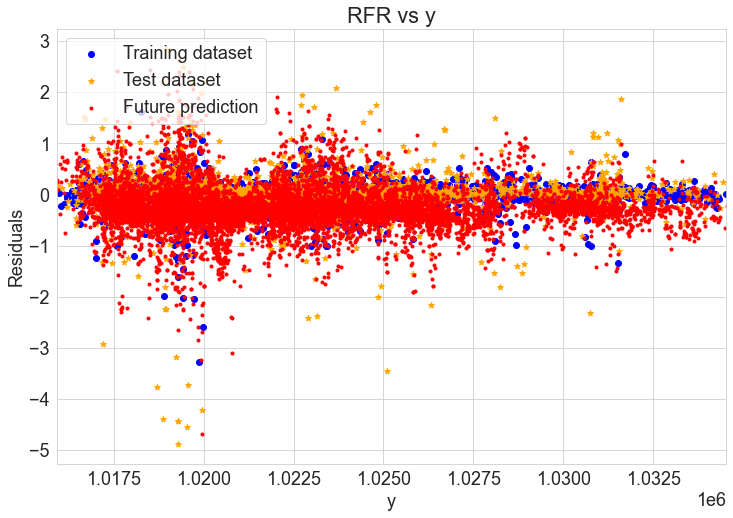

In [215]:
plt.figure(figsize=(12,8))
plt.title('RFR vs y')
plt.scatter(X_traino['y'], y_train_pred - y_traino, c='blue', marker='o', label='Training dataset')
plt.scatter(X_testo['y'], y_test_pred - y_testo, c='orange', marker='*', label='Test dataset')
plt.scatter(Xt['y'], y_pred - yt, c='red', marker='.', label='Future prediction')
plt.xlabel('y')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-50, xmax=100, lw=2, color='k')
plt.xlim([X_traino['y'].values.min(), X_traino['y'].values.max()])
plt.show()

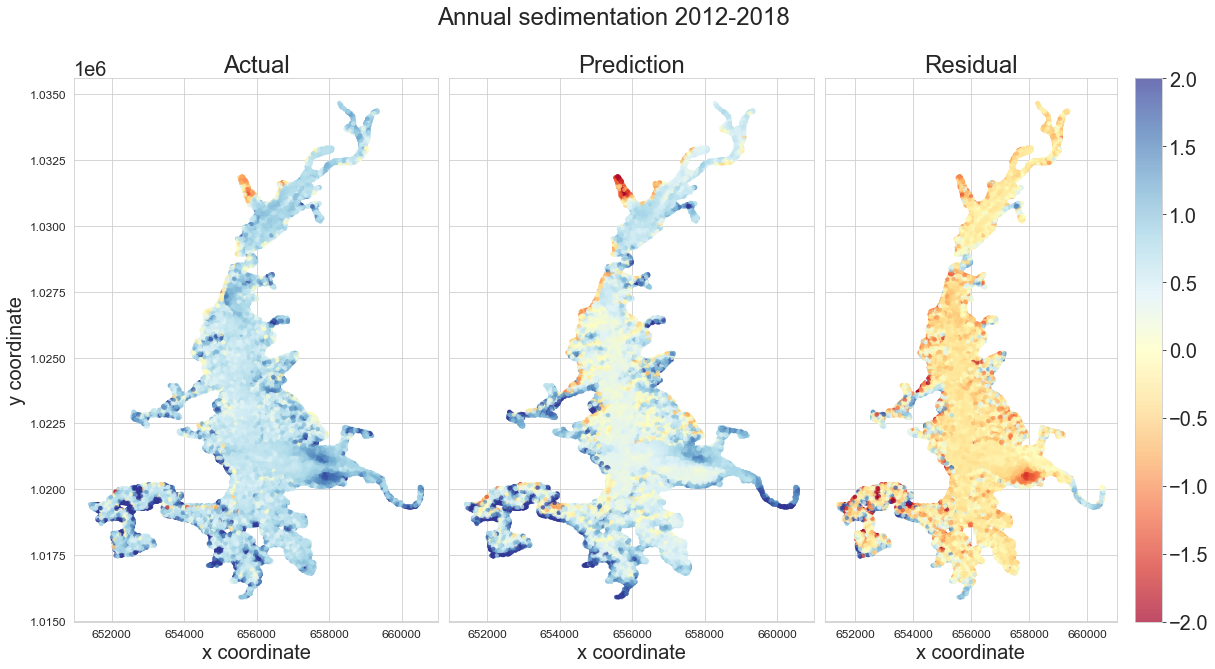

In [307]:
plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True,
                                    figsize=(20, 10))

cm = plt.cm.get_cmap('RdYlBu')

sc = ax[0].scatter(Xt['x'], Xt['y'],
           linewidths=1, alpha=.7,
            edgecolor='none',
           s = 20,
           c=(yt),
            cmap=cm, vmin=-2, vmax=2)


ax[0].set_title('Actual')
ax[0].set_xlabel("x coordinate")
ax[0].set_ylabel("y coordinate")
ax[0].tick_params(labelsize=12)


cm = plt.cm.get_cmap('RdYlBu')
sc = ax[1].scatter(Xt['x'], Xt['y'],
           linewidths=1, alpha=.7,
            edgecolor='none',
           s = 20,
           c=(y_pred),
            cmap=cm, vmin=-2, vmax=2)
cbar.ax.set_ylabel('Change in bed level height per year [m]', rotation=270)
cbar.ax.get_yaxis().labelpad = 20
ax[1].set_title('Prediction')
ax[1].set_xlabel("x coordinate")
ax[1].tick_params(labelsize=12)



sc = ax[2].scatter(Xt['x'], Xt['y'],
           linewidths=1, alpha=.7,
            edgecolor='none',
           s = 20,
           c=(y_pred - yt),
            cmap=cm,  vmin=-2, vmax=2)
ax[2].set_title('Residual')
ax[2].set_xlabel("x coordinate")
ax[2].tick_params(labelsize=12)
cbar = fig.colorbar(sc)

fig.subplots_adjust(wspace=0.03, hspace=0)


fig.suptitle('Annual sedimentation 2012-2018')
plt.show()

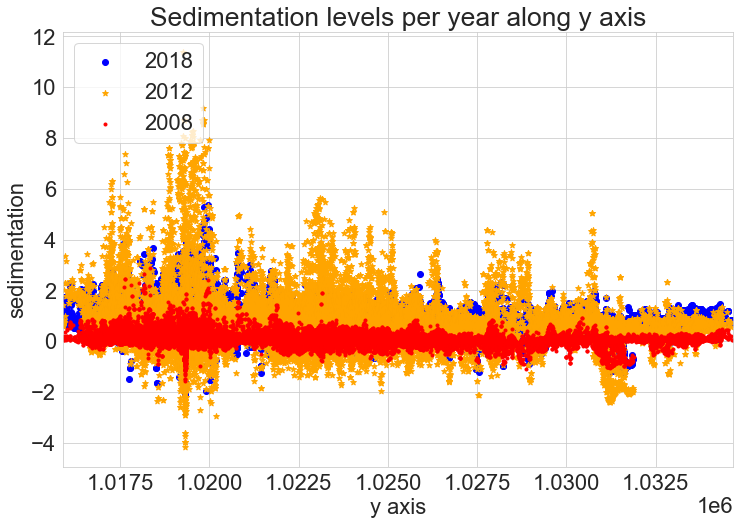

In [81]:
df18 = sklearn.utils.resample(df[df.year == 2018], n_samples=50000, random_state=None, stratify=None)
df12 = sklearn.utils.resample(df[df.year == 2012], n_samples=50000, random_state=None, stratify=None)
df08 = sklearn.utils.resample(df[df.year == 2008], n_samples=50000, random_state=None, stratify=None)
#df97 = sklearn.utils.resample(df[df.year == 1997], n_samples=10000, random_state=None, stratify=None)

plt.figure(figsize=(12,8))
plt.title('Sedimentation levels per year along y axis')
plt.scatter(df18['y'], df18['dh'], c='blue', marker='o', label='2018')
plt.scatter(df12['y'], df12['dh'], c='orange', marker='*', label='2012')
plt.scatter(df08['y'], df08['dh'], c='red', marker='.', label='2008')
#plt.scatter(df97['y'], df97['dh'], c='yellow', marker='.', label='1997')
#plt.scatter(Xt['y'], y_pred, c='green', marker='*', label='2018 pred')
plt.xlabel('y axis')
plt.ylabel('sedimentation')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-50, xmax=100, lw=2, color='k')
plt.xlim([X_traino['y'].values.min(), X_traino['y'].values.max()])
plt.show()

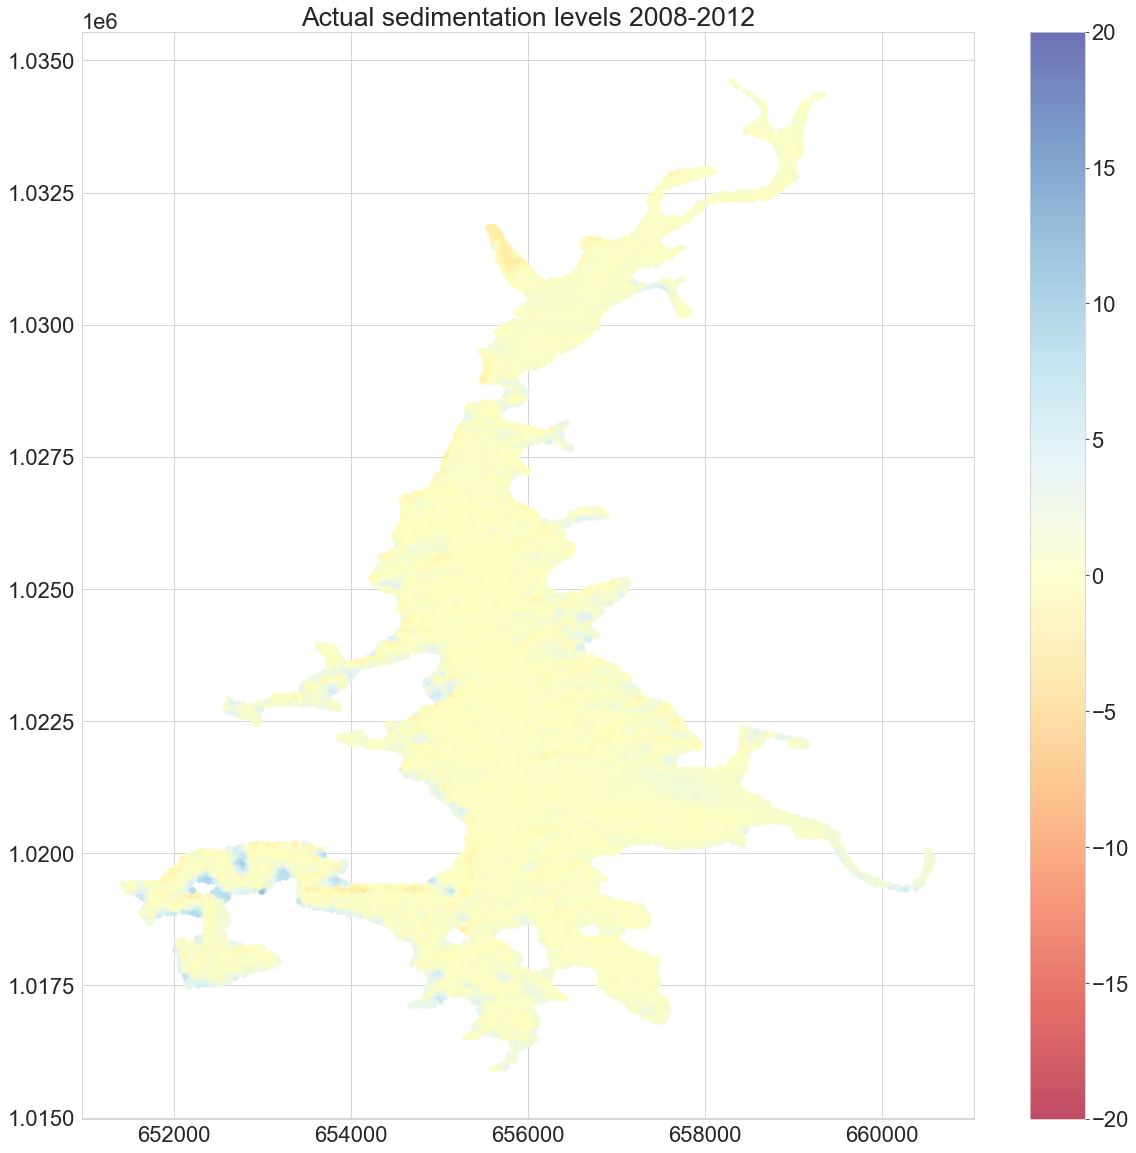

In [82]:
fig = plt.figure(figsize=(20, 20))
ax = plt.axes()
cm = plt.cm.get_cmap('RdYlBu')
sc = plt.scatter(df12['x'], df12['y'],
           linewidths=1, alpha=.7,
            edgecolor='none',
           s = 30,
           c=(df12['dh']),
            cmap=cm)
plt.clim(-2, 2)
cbar = plt.colorbar(sc)
cbar.ax.set_ylabel('Change in bed level height per year [m]', rotation=270)
cbar.ax.get_yaxis().labelpad = 20
plt.title('Actual sedimentation 2008-2012')
plt.xlabel("x coordinate")
plt.ylabel("y coordinate")
plt.show()

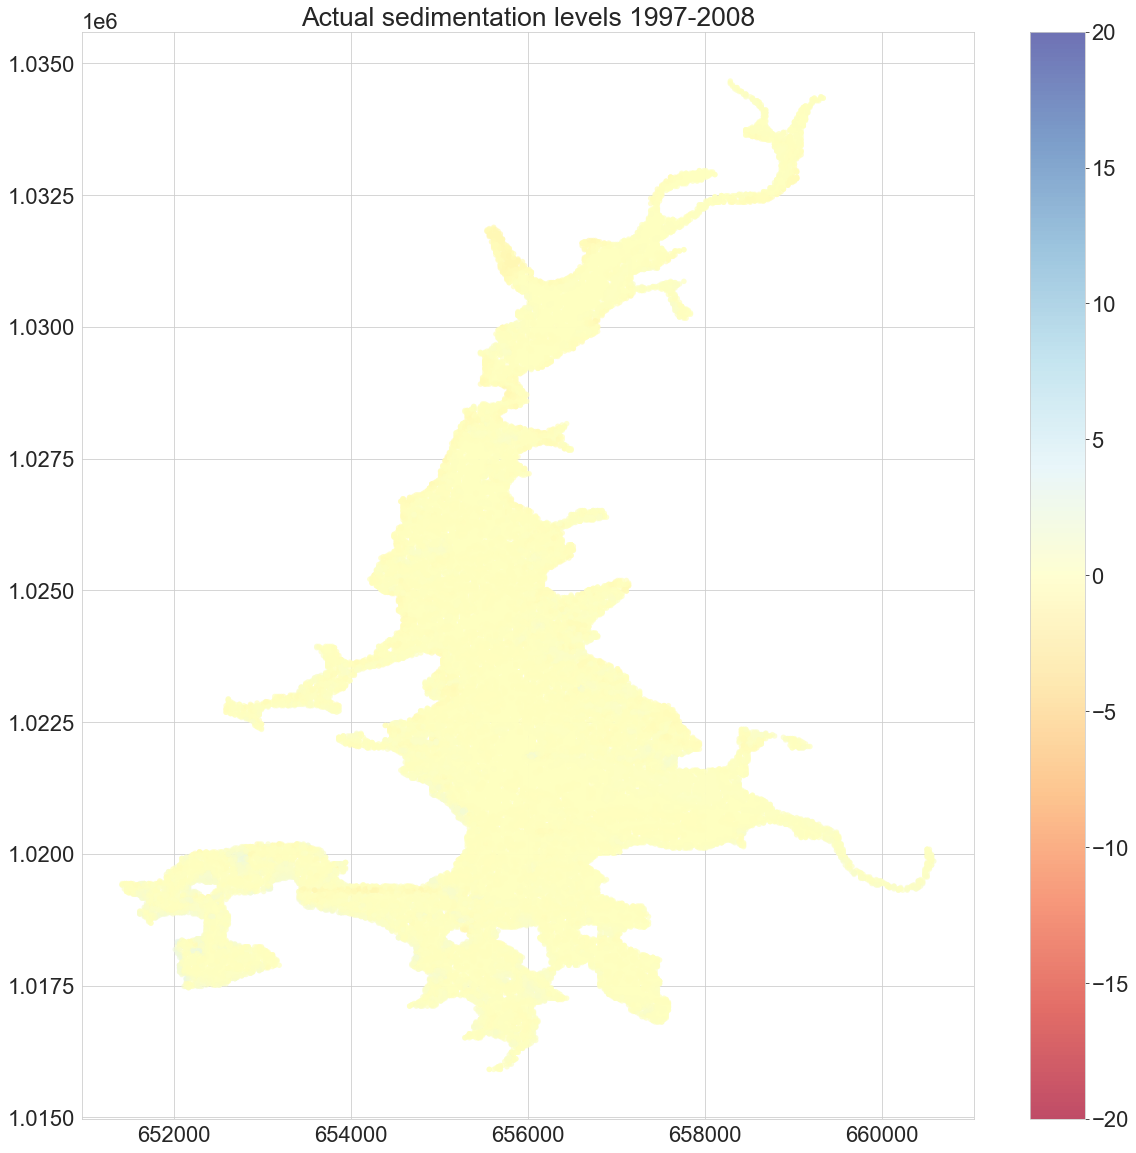

In [83]:
fig = plt.figure(figsize=(20, 20))
ax = plt.axes()
cm = plt.cm.get_cmap('RdYlBu')
sc = plt.scatter(df08['x'], df08['y'],
           linewidths=1, alpha=.7,
            edgecolor='none',
           s = 30,
           c=(df08['dh']),
            cmap=cm)
plt.clim(-2, 2)
cbar = plt.colorbar(sc)
cbar.ax.set_ylabel('Change in bed level height per year [m]', rotation=270)
cbar.ax.get_yaxis().labelpad = 20
plt.title('Actual sedimentation 1997-2008')
plt.xlabel("x coordinate")
plt.ylabel("y coordinate")
plt.show()

Text(0, 0.5, '[m]')

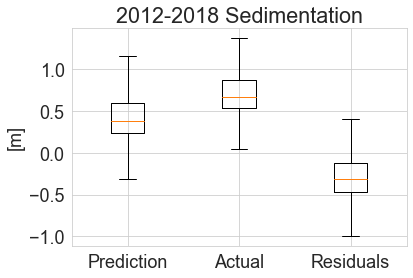

In [164]:
fig4, ax4 = plt.subplots()
ax4.set_title('2012-2018 Sedimentation')
ax4.boxplot([y_pred, yt, (y_pred - yt)], showfliers=False)
plt.xticks([1, 2, 3], ['Prediction', 'Actual', 'Residuals'])
plt.ylabel('[m]')

# Predicting 2022

In [87]:
dffuture = pd.read_csv('data/FutureInputV1.csv', delim_whitespace=False, header=0)

In [88]:
dffuture.keys()

Index(['x', 'y', 'horigin', 'year', 'height', 'slope', 'aspect', 'T', 'dRM1',
       'dRM2', 'dRM3', 'dRM4', 'dRM5', 'dRM6', 'dRM7', 'dRMtot', 'depth',
       'Xfactor'],
      dtype='object')

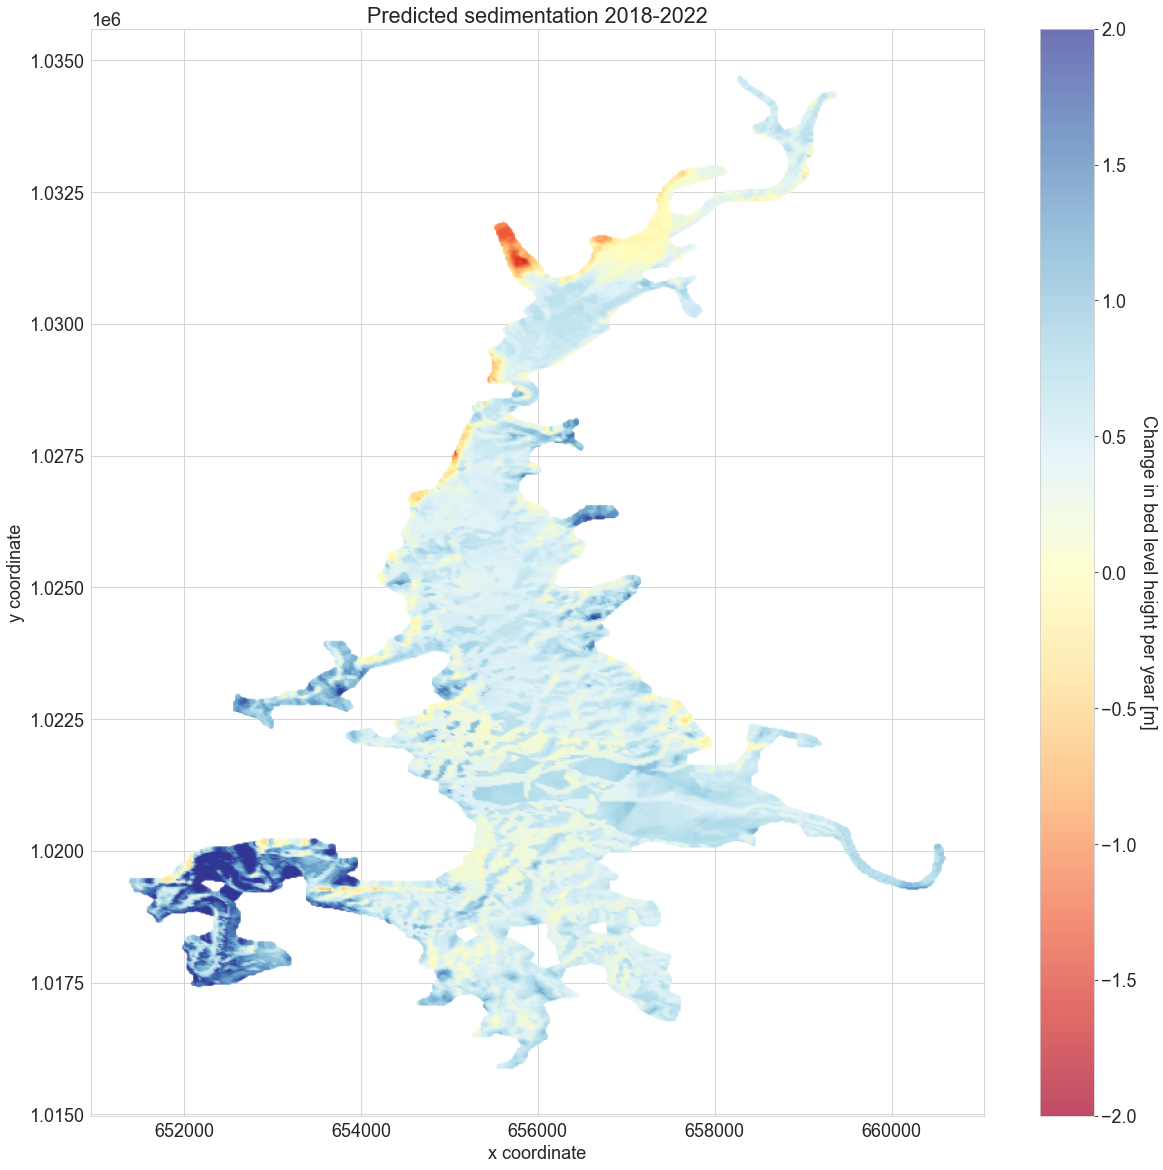

In [108]:
forest3 = RandomForestRegressor()
forest3.fit(df[col_study], df[param_study])
future_pred = forest3.predict(dffuture[col_study])
fig = plt.figure(figsize=(20, 20))
ax = plt.axes()
cm = plt.cm.get_cmap('RdYlBu')
sc = plt.scatter(dffuture['x'], dffuture['y'],
           linewidths=1, alpha=.7,
            edgecolor='none',
           s = 30,
           c=(future_pred),
            cmap=cm)
plt.clim(-2, 2)
cbar = plt.colorbar(sc)
cbar.ax.set_ylabel('Change in bed level height per year [m]', rotation=270)
cbar.ax.get_yaxis().labelpad = 20
plt.title('Predicted sedimentation 2018-2022')
plt.xlabel("x coordinate")
plt.ylabel("y coordinate")
plt.show()

([<matplotlib.axis.XTick at 0x23b00eee248>,
 [Text(1, 0, '97-08'),
  Text(2, 0, '08-12'),
  Text(3, 0, '12-18'),
  Text(4, 0, '18-22')])

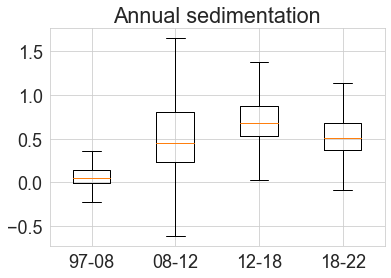

In [106]:
fig4, ax4 = plt.subplots()
ax4.set_title('Annual sedimentation')
ax4.boxplot([df08['dh'],df12['dh'],df18['dh'],future_pred], showfliers=False)
plt.xticks([1, 2, 3, 4], ['97-08', '08-12', '12-18', '18-22'])